In [55]:
import pandas as pd
import numpy as np

In [56]:
train_file = "data.csv"

In [57]:
train_data = pd.read_csv(train_file)
print(train_data.shape)
train_data.head()
train_data.isnull().sum()

(1048575, 8)


id                       0
time:hh:mm:ss.xxx        0
epoch:int                0
moteid:int               0
temperature:real       135
humidity:real          135
light:real           23262
voltage:real             0
dtype: int64

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
id                   1048575 non-null object
time:hh:mm:ss.xxx    1048575 non-null object
epoch:int            1048575 non-null int64
moteid:int           1048575 non-null int64
temperature:real     1048440 non-null float64
humidity:real        1048440 non-null float64
light:real           1025313 non-null float64
voltage:real         1048575 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 64.0+ MB


In [59]:
train_data.info()
train_data.isnull().sum()

print(train_data[['temperature:real','humidity:real']].corr())
print(train_data['temperature:real'].corr(train_data['humidity:real']))

print(train_data[['temperature:real','voltage:real']].corr())
print(train_data['temperature:real'].corr(train_data['voltage:real']))

print(train_data[['temperature:real','light:real']].corr())
print(train_data['temperature:real'].corr(train_data['light:real']))

print(train_data[['humidity:real','voltage:real']].corr())
print(train_data['humidity:real'].corr(train_data['voltage:real']))

print(train_data[['humidity:real','light:real']].corr())
print(train_data['humidity:real'].corr(train_data['light:real']))

print(train_data[['voltage:real','light:real']].corr())
print(train_data['voltage:real'].corr(train_data['light:real']))





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
id                   1048575 non-null object
time:hh:mm:ss.xxx    1048575 non-null object
epoch:int            1048575 non-null int64
moteid:int           1048575 non-null int64
temperature:real     1048440 non-null float64
humidity:real        1048440 non-null float64
light:real           1025313 non-null float64
voltage:real         1048575 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 64.0+ MB
                  temperature:real  humidity:real
temperature:real          1.000000      -0.670589
humidity:real            -0.670589       1.000000
-0.6705888674554639
                  temperature:real  voltage:real
temperature:real          1.000000     -0.751131
voltage:real             -0.751131      1.000000
-0.7511308607798265
                  temperature:real  light:real
temperature:real           1.00000     0.01892
light:real                 0.018

In [60]:
#plot all features to see how data is distributed
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline 
#train_data.hist(bins=50, figsize=(20,15))
plt.show()


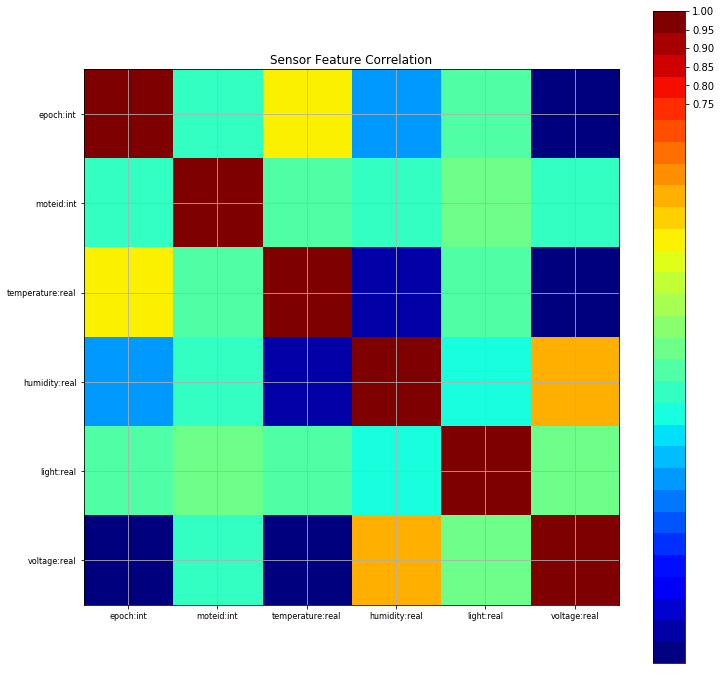

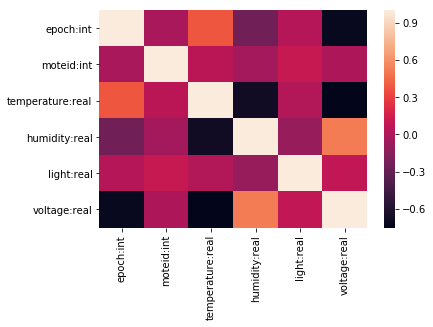

In [61]:
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    import seaborn as sns

    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(train_data.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Sensor Feature Correlation')
    labels=['time:hh:mm:ss.xxx','epoch:int','moteid:int','temperature:real','humidity:real','light:real','voltage:real',]
    ax1.set_xticklabels(labels,fontsize=8)
    ax1.set_yticklabels(labels,fontsize=8)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()
    
    sns.heatmap(train_data.corr())

In [62]:
#train_data.plot(kind="scatter", x="epoch:int", y="light:real", figsize=(10,8))


In [64]:
import numpy
train_data[['temperature:real','humidity:real']] = train_data[['temperature:real','humidity:real']].replace(0,numpy.NaN)
train_data.fillna(train_data.mean(), inplace=True)

print(train_data.isnull().sum())




id                   0
time:hh:mm:ss.xxx    0
epoch:int            0
moteid:int           0
temperature:real     0
humidity:real        0
light:real           0
voltage:real         0
dtype: int64


In [65]:
import numpy
train_data[['temperature:real','humidity:real','light:real']] = train_data[['temperature:real','humidity:real','light:real']].replace(0,numpy.NaN)
train_data.fillna(train_data.mean(), inplace=True)

print(train_data.isnull().sum())

id                   0
time:hh:mm:ss.xxx    0
epoch:int            0
moteid:int           0
temperature:real     0
humidity:real        0
light:real           0
voltage:real         0
dtype: int64


In [66]:

print(train_data[['temperature:real','humidity:real']].corr())
print(train_data['temperature:real'].corr(train_data['humidity:real']))

print(train_data[['temperature:real','voltage:real']].corr())
print(train_data['temperature:real'].corr(train_data['voltage:real']))

print(train_data[['temperature:real','light:real']].corr())
print(train_data['temperature:real'].corr(train_data['light:real']))

print(train_data[['humidity:real','voltage:real']].corr())
print(train_data['humidity:real'].corr(train_data['voltage:real']))

print(train_data[['humidity:real','light:real']].corr())
print(train_data['humidity:real'].corr(train_data['light:real']))

print(train_data[['voltage:real','light:real']].corr())
print(train_data['voltage:real'].corr(train_data['light:real']))





                  temperature:real  humidity:real
temperature:real          1.000000      -0.670589
humidity:real            -0.670589       1.000000
-0.670588867455466
                  temperature:real  voltage:real
temperature:real          1.000000     -0.751016
voltage:real             -0.751016      1.000000
-0.7510155930450466
                  temperature:real  light:real
temperature:real          1.000000    0.018668
light:real                0.018668    1.000000
0.01866802678270728
               humidity:real  voltage:real
humidity:real       1.000000      0.518718
voltage:real        0.518718      1.000000
0.5187182854049684
               humidity:real  light:real
humidity:real       1.000000   -0.089163
light:real         -0.089163    1.000000
-0.0891629338286603
              voltage:real  light:real
voltage:real      1.000000    0.076319
light:real        0.076319    1.000000
0.07631928302718817


In [67]:
import pandas as pd
import numpy as np
train_file = "sensors_2_3.csv"

In [68]:
train_data = pd.read_csv(train_file)
print(train_data.shape)
train_data.head()
train_data.isnull().sum()

(31922, 11)


epoch:int            0
moteid:int           0
temperature:real     0
humidity:real        0
light:real           0
voltage:rea          0
moteid:int2          0
temperature:real3    0
humidity:real4       1
light:real5          1
voltage:rea6         1
dtype: int64

In [72]:
train_data.isnull().sum()

print(train_data[['temperature:real','temperature:real3']].corr())
print(train_data['temperature:real'].corr(train_data['temperature:real3']))

#print(train_data[['temperature:real','voltage:real']].corr())
#print(train_data['temperature:real'].corr(train_data['voltage:real']))

print(train_data[['light:real','light:real5']].corr())
print(train_data['light:real'].corr(train_data['light:real5']))

print(train_data[['humidity:real','humidity:real4']].corr())
print(train_data['humidity:real'].corr(train_data['humidity:real4']))

#print(train_data[['humidity:real','light:real']].corr())
#print(train_data['humidity:real'].corr(train_data['light:real']))

print(train_data[['voltage:rea','voltage:rea6']].corr())
print(train_data['voltage:rea'].corr(train_data['voltage:rea6']))

                   temperature:real  temperature:real3
temperature:real           1.000000           0.262069
temperature:real3          0.262069           1.000000
0.2620690313199442
             light:real  light:real5
light:real     1.000000     0.581865
light:real5    0.581865     1.000000
0.5818654975188744
                humidity:real  humidity:real4
humidity:real        1.000000        0.364957
humidity:real4       0.364957        1.000000
0.36495659291287474
              voltage:rea  voltage:rea6
voltage:rea      1.000000      0.597847
voltage:rea6     0.597847      1.000000
0.5978472231786699


In [73]:
import pandas as pd
import numpy as np
train_file = "sensors_9_16.csv"

In [74]:
train_data = pd.read_csv(train_file)
print(train_data.shape)
train_data.head()
train_data.isnull().sum()

(26090, 11)


epoch:int                0
moteid:int               0
temperature:real9        0
humidity:real9           1
light:real9              1
voltage:real9         2396
moteid:int2              0
temperature:real16       0
humidity:real16          3
light:real16             3
voltage:real16        1065
dtype: int64

In [77]:
train_data.isnull().sum()

print(train_data[['temperature:real9','temperature:real16']].corr())
print(train_data['temperature:real9'].corr(train_data['temperature:real16']))

print(train_data[['light:real9','light:real16']].corr())
print(train_data['light:real9'].corr(train_data['light:real16']))

print(train_data[['humidity:real9','humidity:real16']].corr())
print(train_data['humidity:real9'].corr(train_data['humidity:real16']))


print(train_data[['voltage:real9','voltage:real16']].corr())
print(train_data['voltage:real9'].corr(train_data['voltage:real16']))

                    temperature:real9  temperature:real16
temperature:real9            1.000000            0.394294
temperature:real16           0.394294            1.000000
0.3942938709683293
              light:real9  light:real16
light:real9       1.00000       0.75312
light:real16      0.75312       1.00000
0.7531199177412055
                 humidity:real9  humidity:real16
humidity:real9         1.000000         0.450706
humidity:real16        0.450706         1.000000
0.45070609156792285
                voltage:real9  voltage:real16
voltage:real9        1.000000        0.799385
voltage:real16       0.799385        1.000000
0.7993847833368155
